# I. Exploratory Data Analysis (EDA)
This notebook contains an initial exploratory analysis of the dataset 'Klienci_DB.csv' to understand its structure, distributions, and potential insights.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot style
plt.style.use("ggplot")
sns.set_theme(style="whitegrid")

In [67]:
# Load the dataset
df = pd.read_csv("/Users/wyko/churn-prediction-project/data/raw/Klienci_DB.csv")

## 1. Dataset Overview
basic information about the structure of the dataset.

In [68]:
# Show shape, column names, and types
print("Shape: ", df.shape)
print("Columns: ", df.columns.tolist())
print("\nData types\n", df.dtypes)

# More detailed info
df.info()

# Preview first 5 rows
df.head()

Shape:  (100000, 10)
Columns:  ['klient_id', 'wiek', 'miasto', 'plec', 'dochód_miesięczny', 'dni_od_ostatniego_zakupu', 'średnia_wartość_zakupu', 'liczba_reklamacji', 'czy_konto_firmowe', 'czy_churn']

Data types
 klient_id                     int64
wiek                          int64
miasto                       object
plec                         object
dochód_miesięczny           float64
dni_od_ostatniego_zakupu      int64
średnia_wartość_zakupu      float64
liczba_reklamacji             int64
czy_konto_firmowe             int64
czy_churn                     int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   klient_id                 100000 non-null  int64  
 1   wiek                      100000 non-null  int64  
 2   miasto                    100000 non-null  object 
 3   plec             

,klient_id,wiek,miasto,plec,dochód_miesięczny,dni_od_ostatniego_zakupu,średnia_wartość_zakupu,liczba_reklamacji,czy_konto_firmowe,czy_churn
0,1,56,Poznań,M,4664.33,309,280.58,0,1,1
1,2,69,Warszawa,M,8742.58,339,355.37,0,0,1
2,3,46,Kraków,M,6767.96,176,304.54,0,0,0
3,4,32,Lublin,K,2949.22,287,186.65,0,0,1
4,5,60,Gdańsk,K,6935.82,166,165.26,0,0,1


#### Dataset Overview Summary

The dataser contains **100,000 rows and 10 columns**, including both numerical and categorical features.
Key features include:
- Demographic attributes such as 'wiek', 'miasto', 'plec'
- Behavioral attributes like 'dni_od+ostatniego_zakupu' and 'średnia_wartość_zakupu'
- Targer variable: 'czy_churn' (0 = retained, 1 = churned)

The dataset appears clean and well-structured, with appropriate data types assigned to each feature.

## 2. Missing Values
Check for any missing or null values in the dataset.

In [69]:
# Count of missing values per column
df.isnull().sum()

klient_id                   0
wiek                        0
miasto                      0
plec                        0
dochód_miesięczny           0
dni_od_ostatniego_zakupu    0
średnia_wartość_zakupu      0
liczba_reklamacji           0
czy_konto_firmowe           0
czy_churn                   0
dtype: int64

#### Missing values Summary

There are no missing values in this dataset.
This is beneficial as it eliminates the need for imputation or now removal and simplifies the modeling process in the next steps.

## 3.Descriptive Statistics
Summary of numerical features in the dataset.

In [70]:
# Summary statistics 
df.describe()

,klient_id,wiek,dochód_miesięczny,dni_od_ostatniego_zakupu,średnia_wartość_zakupu,liczba_reklamacji,czy_konto_firmowe,czy_churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,50000.500000,48.525990,7006.221488,182.036100,249.881993,0.499280,0.19900,0.64100
std,28867.657797,17.886768,2002.273857,105.084968,79.970436,0.706289,0.39925,0.47971
min,1.000000,18.000000,-1945.560000,0.000000,-108.640000,0.000000,0.00000,0.00000
25%,25000.750000,33.000000,5658.687500,91.000000,195.770000,0.000000,0.00000,0.00000
50%,50000.500000,48.000000,7003.880000,182.000000,249.950000,0.000000,0.00000,1.00000
75%,75000.250000,64.000000,8352.752500,273.000000,304.030000,1.000000,0.00000,1.00000
max,100000.000000,79.000000,15596.560000,364.000000,608.760000,6.000000,1.00000,1.00000


#### Descriptive Statistics Summary

**Key Insights:**
- Outliers are present in several features and may affect model training.
- The dataset shows **class imbalance** in the target variable (`czy_churn`), which will need to be addressed when modeling.
- Data quality is overall good, but certain variables (like negative values) require cleaning or closer inspection.

## 4. Variable Distributions
Let's explore the distribution of key numerical features.

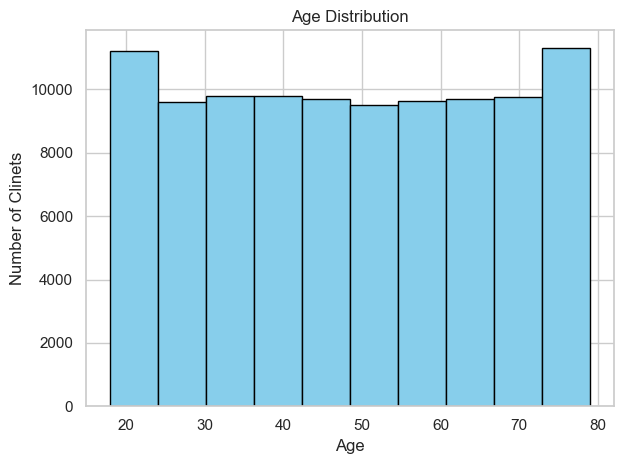

In [71]:
# Age distribution
df["wiek"].hist(bins=10, color="skyblue", edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Clinets")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Age Distribution 

The age distribution of clients appears to be relatively uniform, with a slightly higher number of clinets at the youngest (18-25) and oldest (75-80) age ranges.

- No major skewness or anomalies are present.
- The dataset includes a well-balanced range of ages between 18 and 80.
- This indicates good representation across different age groups for further analysis.

Overall, the age data apperas to be clean and evenly distributed.

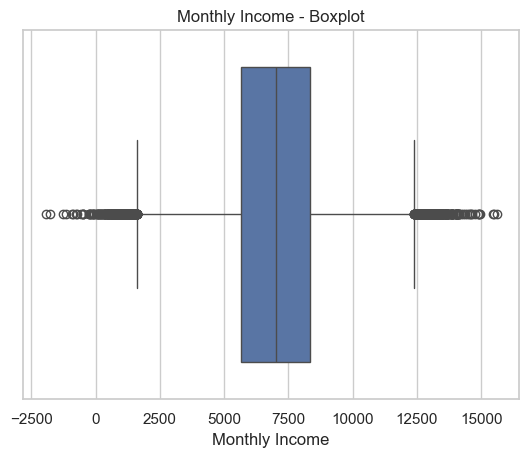

In [72]:
#Monthly income boxplot
sns.boxplot(x=df["dochód_miesięczny"])
plt.title("Monthly Income - Boxplot")
plt.xlabel("Monthly Income")
plt.show()

#### Boxplot Analysis: Monthly Income
The boxplot above shows the distribution of customers' monthly income.

- The median monthly income is around 7500.
- There is a high concetration of customers earing between ~5500 and ~9500.
- A significant number of outliers exist on both the lowe and higher ends of the income spectrum.
- These outliners might be worth investigating further to check for data entry errors or special customers grops.

Overall, the data is slightl skewed and not perfectly symmetric.

### 5. Analysis of Categorical Variables

Let's examine the distribution of categorical variables to understand the composition of the dataset. 
This includes gender, city, company account status and churn status.

We will look at their value counts and visualize them using count plots.

plec
K    50307
M    49693
Name: count, dtype: int64




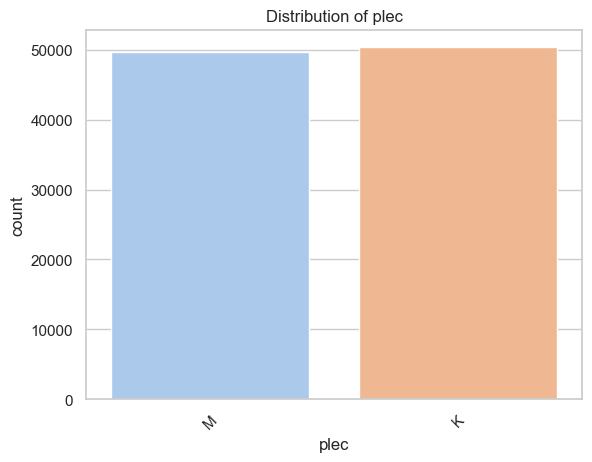

miasto
Kraków      14409
Poznań      14397
Lublin      14338
Warszawa    14276
Łódź        14207
Gdańsk      14197
Wrocław     14176
Name: count, dtype: int64




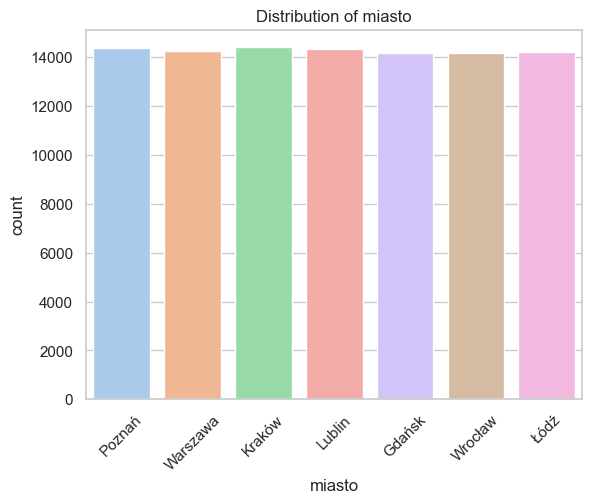

czy_konto_firmowe
0    80100
1    19900
Name: count, dtype: int64




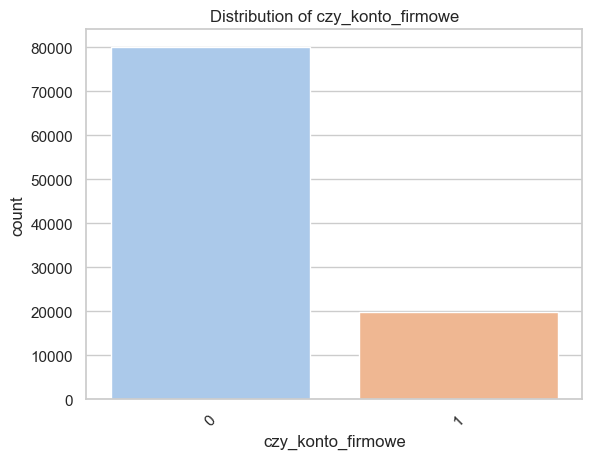

czy_churn
1    64100
0    35900
Name: count, dtype: int64




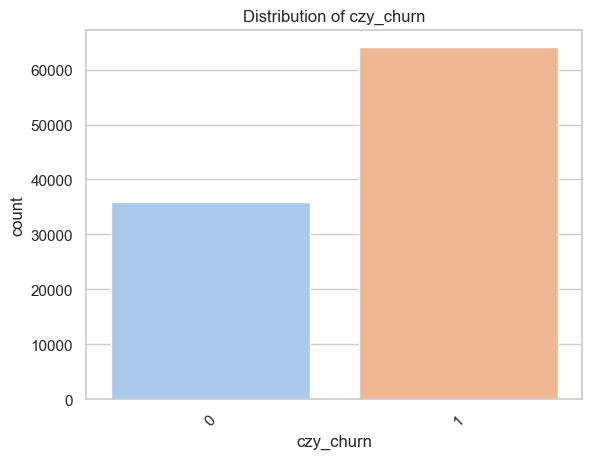

In [73]:
categorical_cols = ['plec', 'miasto','czy_konto_firmowe', 'czy_churn']
for col in categorical_cols:
    print(df[col].value_counts())
    print("\n")

    sns.countplot(data=df, x=col, hue=col,palette='pastel', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

### Categorical Variable Analysis - Summary

The following barplots represent the distribution of categorical variables: plec, miasto, czy_konto_firmowe, czy_churn.

#### 1. Gender (plec)
- The gender distribution is nearly balanced.
- Slighlty more female (K) customers than male (M), but the difference is negligible and not concerning from a data bias perspective.

#### 2. City (miasto)
- The distribution of customers across different cities is almost uniform.
- This suggest that the dataset was likely constructed to avoid location bias or represents a broad and balanced customer base.

#### 3. Company Account (czy_konto_firmowe)
- The majority of customers do not use a business account.
- Only about 20% of clients use company accounts.
- This might be useful in churn anaysis - company accounts may churn differently.

#### 4. Churn Status(czy_churn)
- The class is imbalanced - over 60% of customers are marked as chruned(1), while ~35% stayed(0).
- This imbalnce may need toi be hanled later during model training (e.g., using SMOTE, class weights, etc.).

#### Overall Summary
- The categorical variables appear to be balanced and representative, especially in terms of gender and location.
- the class imbalnce in the churn variable is the most important insight - it will directly impact model evaluation and requiers attetion.
- The low number of business accounts migth indicate that the service is mostly targeted toward individual clients, which could influence feature importance in churn prediction.

### 6. Correlation Between Numerical Variables

To detect potential relationships between numerical features (e.g., age, monthly income, days from last purchase, average purchase, count of complaints)\

This helps to identify multicollinearity and patterns worth deeper investigation.

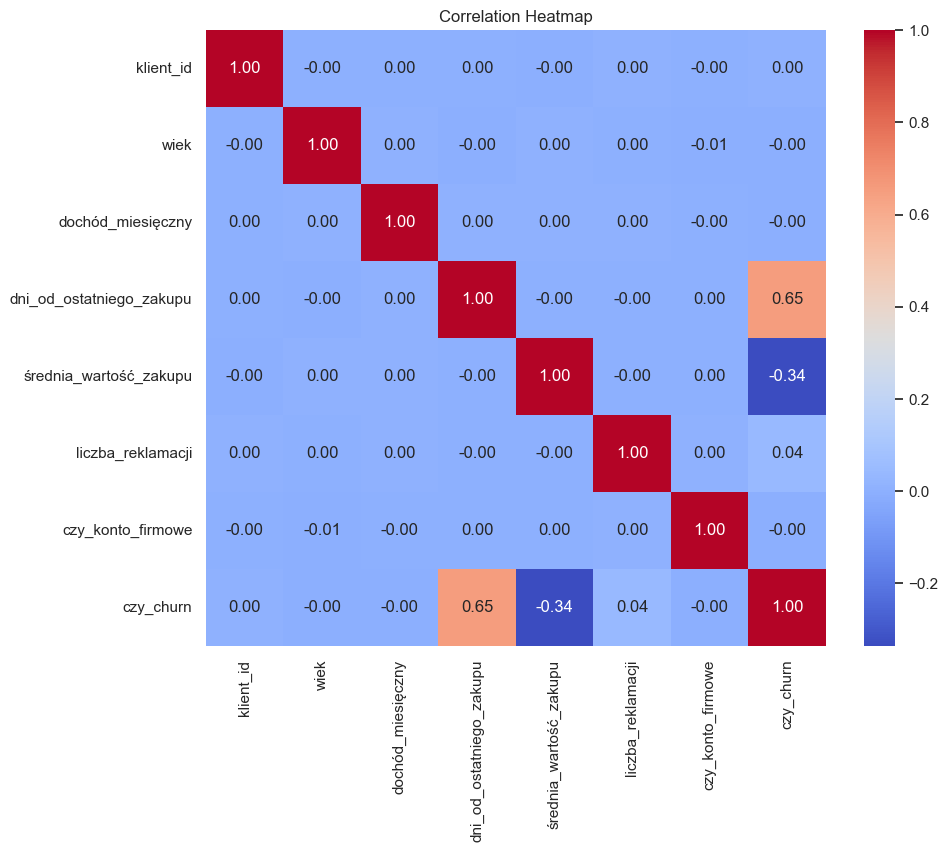

In [74]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Correlation Analysis

The correlation heatmap shows the linear relationships between numerical features.

- 'dni_od_ostatniego_zakupu' has the strongest postivie correlation with churn ('0.65'), suggesting that customers who haven't purchased for a long time are more likely to churn.
- 'średnia_wartość_zakupu' shows a moderate negative correlation with churn ('-0.34'), indicating that customers with higher purchase values tend to stay.
- Other variables, such as 'wiek', 'dochód_miesięczny' or 'liczba_reklamacji', do not exhibit a strong correlation with churn.

### 7. Outlier Detecion

Outliers can significantly affect model performance. We will use boxplots to visually inspect potential outliers for key numerical features.

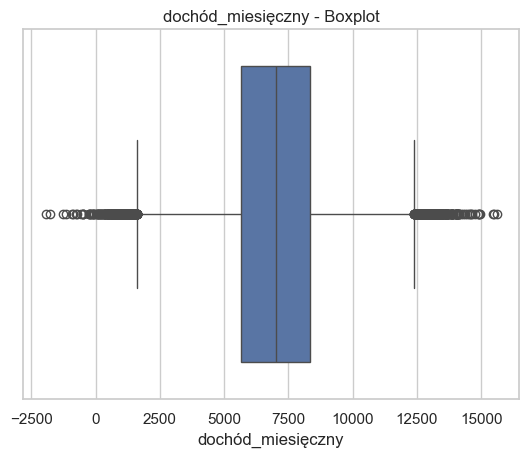

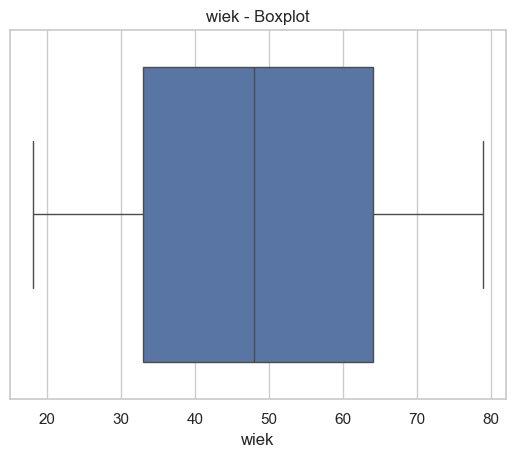

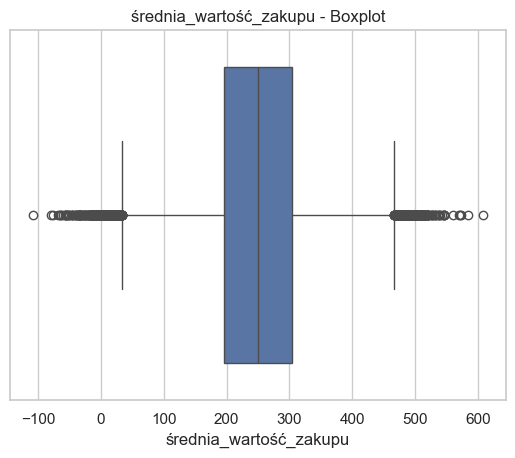

In [75]:
num_cols = ['dochód_miesięczny', 'wiek', 'średnia_wartość_zakupu']

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'{col} - Boxplot')
    plt.show()

In [76]:
columns_to_clean = ["dochód_miesięczny", "średnia_wartość_zakupu"]

for col in columns_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

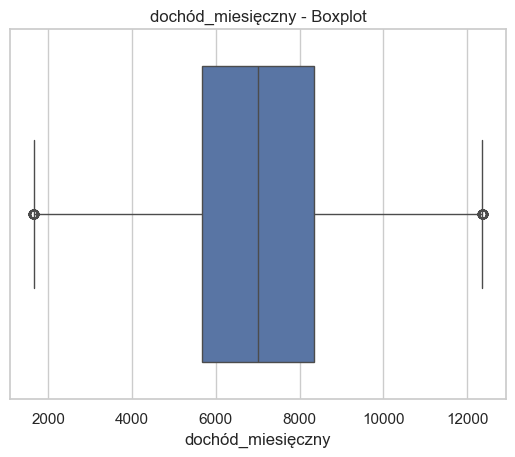

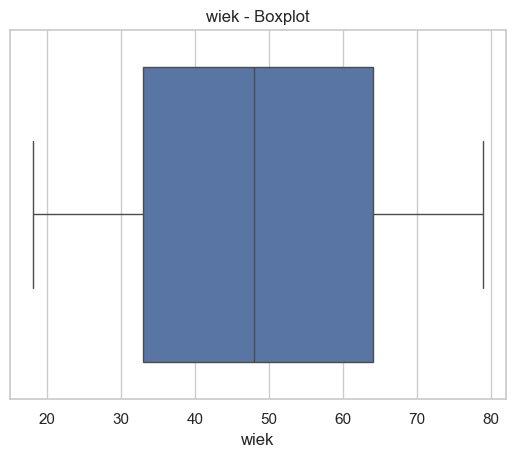

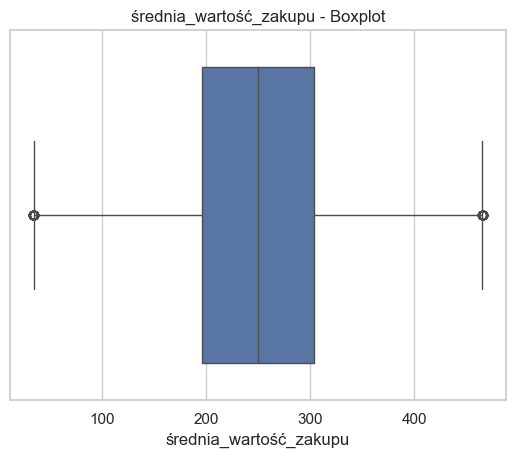

In [77]:
num_cols = ['dochód_miesięczny', 'wiek', 'średnia_wartość_zakupu']

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'{col} - Boxplot')
    plt.show()

#### Outlier Detection - Summary

Outliers can significantly affect the performance of machine learing models by skewing the distribution of numerical features and introducing noise.

To detect them, we visualized key numeric features using boxplots.
- Monthly Income (dochód_miesięczny)
- Average Purchase Value (średnia_wartość_zakupu)

We observed visible outliers in both features, especially on the high and low ends.
To clean the data, IQR method was applied, removing values outside the [Q1 - 1.5xIQR, Q3 + 1.5xIQR] range.
This approach helped reduce the influence of extreme values while keeping the majority of valid data.

After cleaning, updated boxplots confirmed the improved distributions, with most extreme values successfully removed.

### 8. Relationships with Target Variable (Churn)

Finally, we analyze how key features relate to the target variable 'czy_churn'.

This will help identify patterns and variable that may influence customer retention.

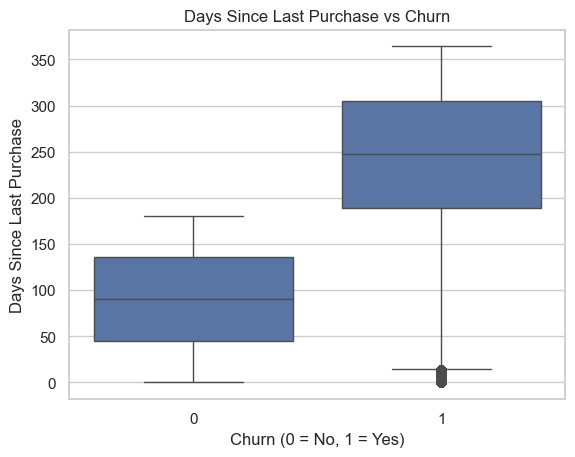

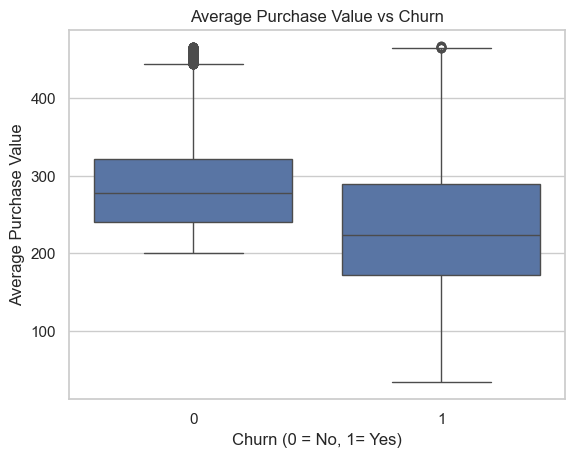

In [78]:
# Visualize churn vs. days since last 
sns.boxplot(data=df, x='czy_churn', y='dni_od_ostatniego_zakupu')
plt.title("Days Since Last Purchase vs Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Days Since Last Purchase")
plt.show()

# Visualize churn vs. average purchase value
sns.boxplot(data=df, x='czy_churn', y = 'średnia_wartość_zakupu')
plt.title("Average Purchase Value vs Churn")
plt.xlabel("Churn (0 = No, 1= Yes)")
plt.ylabel("Average Purchase Value")
plt.show()

#### Relationship Between Features and Churn

 - **Days Since Last Purchase**: Churned customers have significantly higher values, indicating longer inactivity before leaving.
 - **Average Purchase Value**: Churned users tend to spend less on avergae compared to retained customers.

 Overall both variables show meaningful and may serve as strong predictiors of churn.

# II. Feature Engineering

In this step, new features are engineered to improve model performance:
- Created a binary feature 'aktywny_klient' based on purchase recency.
- Encoded categorical variables:
    - 'plec' using Label Encoding.
    - 'miasto' using One-Hot Encoding.
- Scaled numerical features to normalize their distribution.

In [79]:
# Adding new variable 'akltywny_klient', where client had purchased in the last 90 days
df['aktywny_klient'] = df['dni_od_ostatniego_zakupu'].apply(lambda x: 1 if x<=90 else 0)

In [ ]:
#Coding categorical variables
# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['plec_encoded'] = le.fit_transform(df['plec'])

# One-Hot Encoding
# Skip this line if 'miasto' is already encoded:
df = pd.get_dummies(df, columns=['miasto'], drop_first=True)

#### Encoding Categorical variables

We have two categorical columns:

- **'plec'** (gender): This column contains only two values ("M" or "K"). It can be encoded using 'LabelEncoder', which transforms the labels into 0 and 1.
- **'miasto'** (city): Since this is a nominal variable with no intrinsic order, we use **One-Hot Encoding**, which creates binary columns for each city.

This step helps machine learing algorithms interpret categorical data numerically.

# III. Data PreProcessing 

Before training any machine learning model, it's crucial to prepare the dataset properly. In this step, we clean and structure the data:

- Drop unnecessary or redundant columns (e.g., indentifiers or already encoded variables)
- Define feature variables ('X') and targer variable ('y').
- Split the data into trainging and test sets to evaluate model performance fairy.

These steps help ensure the mosel is trained on high-quality, relevant data and prevent data leakage.

In [ ]:
# Dropping unnecessary columns

df = df.drop(columns=['klient_id', 'plec']) # plec is already encoded

In [94]:
from sklearn.preprocessing import StandardScaler
# Separate features and target variables
x = df.drop(columns=['czy_churn']) # features (predictors)
y = df['czy_churn'] # target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [95]:
# Traing/Test Split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# IV. Model Training & Evaluation

In this step, we train a baseline classification model (Logistic Regression) to predict churn.

We evaluate the model using accuracy, precision, recall and F1-score to access its predictive power.
The confusion matrix helps visualize correct vs. incorrect predictions.

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      7093
           1       0.92      0.92      0.92     12626

    accuracy                           0.89     19719
   macro avg       0.89      0.89      0.89     19719
weighted avg       0.90      0.89      0.89     19719



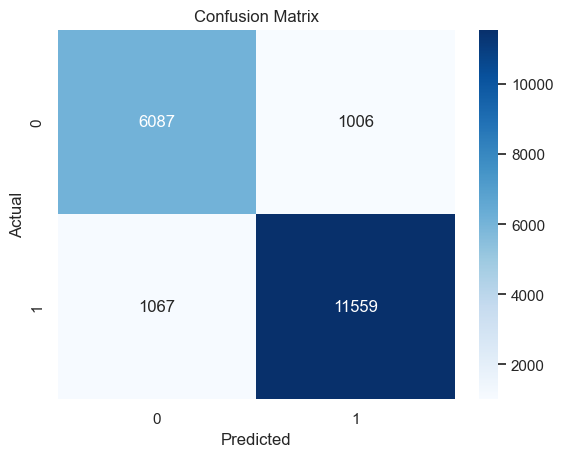

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Classification report 
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## IV. Model Training

As a baseline model, we train a Logistic Regression classifier to predict customer churn.

Logistic Regression is a simple yet effective algorithm for binary classification tasks like churn prediction.  
Before training, we scaled the numerical features to improve convergence.

### Summary:
- Model: Logistic Regression
- Data: Scaled numeric features
- Split: 80% train / 20% test
- Evaluation: Classification report & confusion matrix

### Results:
- Accuracy: 0.89
- Precision (Class 1 - churn): 0.92
- Recall (Class 1 - churn): 0.92
- F1-score (Class 1 - churn): 0.92

These results indicate that the model performs well in identifying churners (class 1). However, we'll continue by testing other models to compare performance and potentially improve results.

In [100]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier  
from sklearn.model_selection import cross_val_score

# Initialize and train models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier( eval_metric='logloss')
}

# Predict on test set
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

#Results of the models
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1 Score", ascending=False)
display(results_df)

cv_results = []

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='f1')  # Możesz też użyć 'accuracy', 'precision', 'recall'
    cv_results.append({
        "Model": name,
        "Mean F1 Score (CV)": scores.mean(),
        "Std Dev": scores.std()
    })

cv_df = pd.DataFrame(cv_results)
cv_df = cv_df.sort_values(by="Mean F1 Score (CV)", ascending=False)
display(cv_df)

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,1.000000,1.000000,1.000000,1.000000
1,Gradient Boosting,1.000000,1.000000,1.000000,1.000000
2,Decision Tree,1.000000,1.000000,1.000000,1.000000
4,XGBoost,0.997414,0.998020,0.997941,0.997980
3,KNN,0.947259,0.962848,0.954459,0.958635


,Model,Mean F1 Score (CV),Std Dev
1,Gradient Boosting,1.000000,0.000000
2,Decision Tree,1.000000,0.000000
0,Random Forest,0.999992,0.000016
4,XGBoost,0.998931,0.000779
3,KNN,0.958899,0.001491


## IV. Model Training & Evaluation

We trained and evaluated several machine learning models to predict customer churn. The following models were tested:

- Logistic Regression
- Random Forest
- Gradient Boosting
- Decision Tree
- XGBoost
- K-Nearest Neighbors (KNN)

### Performance on Test Set
The models were first trained on the training data and evaluated on the test data. Metrics such as accuracy, precision, recall, and F1-score were used.

> Tree-based models (Random Forest, Gradient Boosting, and Decision Tree) achieved **perfect scores** across all metrics, suggesting a possible case of overfitting or highly separable classes.

### Cross-Validation
To ensure generalization, we performed 5-fold cross-validation. Again, the same models achieved near-perfect F1-scores with almost no variance.

> This consistency reinforces the idea that the dataset might be relatively easy for classifiers to distinguish churners from non-churners.

### Conclusion
All models performed exceptionally well, with Random Forest and Gradient Boosting being the top choices. Based on performance and interpretability, we may proceed with Random Forest for final deployment.